# 8. Advanced Statistical Methods

This notebook provides an introduction to several advanced statistical techniques that go beyond basic regression and hypothesis testing. We will briefly touch upon methods for classification, dimensionality reduction, and non-parametric tests.

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.decomposition import PCA

sns.set_style('whitegrid')

## 8.1 Logistic Regression

While linear regression is used to predict a continuous value, **logistic regression** is used to predict a **categorical outcome** (e.g., Yes/No, True/False). It models the probability that a given input point belongs to a certain category.

**Use Case:** Predicting whether a student will pass an exam (Pass/Fail) based on the number of hours they studied.

In [3]:
# Generate sample data
hours_studied = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10])
passed = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1]) # 0=Fail, 1=Pass

# Add a constant for the intercept
X = sm.add_constant(hours_studied)

# Fit the logistic regression model
logit_model = sm.Logit(passed, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.286632
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   15
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.5851
Time:                        23:27:34   Log-Likelihood:                -4.2995
converged:                       True   LL-Null:                       -10.364
Covariance Type:            nonrobust   LLR p-value:                 0.0004965
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5631      3.523     -1.863      0.062     -13.468       0.341
x1             1.3647      0.

## 8.2 Principal Component Analysis (PCA)

**PCA** is a **dimensionality reduction** technique. It's used when you have a large number of correlated variables and you want to reduce them to a smaller number of 'principal components' that still capture most of the variance in the original data.

**Use Case:** Visualizing high-dimensional data (like the Iris dataset with 4 features) in 2D.

Original shape: (150, 4)
Transformed shape: (150, 2)


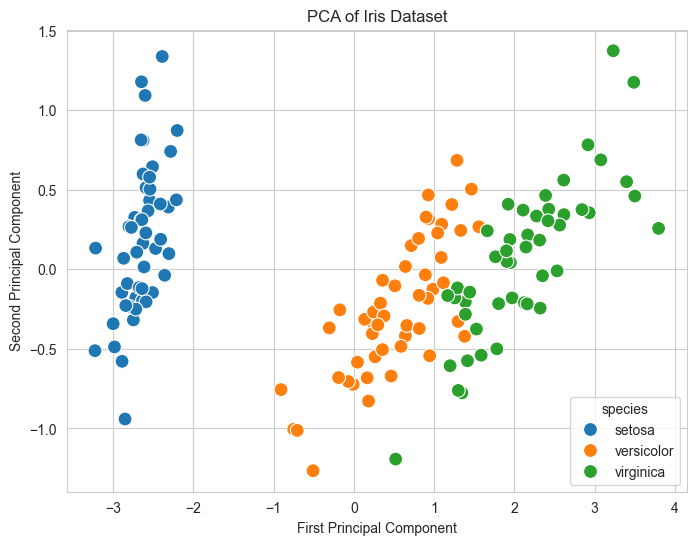

In [4]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Initialize PCA to find 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X_iris)

print(f"Original shape: {X_iris.shape}")
print(f"Transformed shape: {X_pca.shape}")

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_iris, s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## 8.3 Time Series Analysis

**Time series analysis** involves analyzing data points collected over time. The goal is often to identify patterns like trends, seasonality, and cycles to make forecasts.

A common first step is to **decompose** a time series into its components:
- **Trend:** The long-term direction of the data.
- **Seasonality:** A repeating pattern at fixed intervals (e.g., daily, weekly, yearly).
- **Residual:** The random noise left over after removing the trend and seasonality.

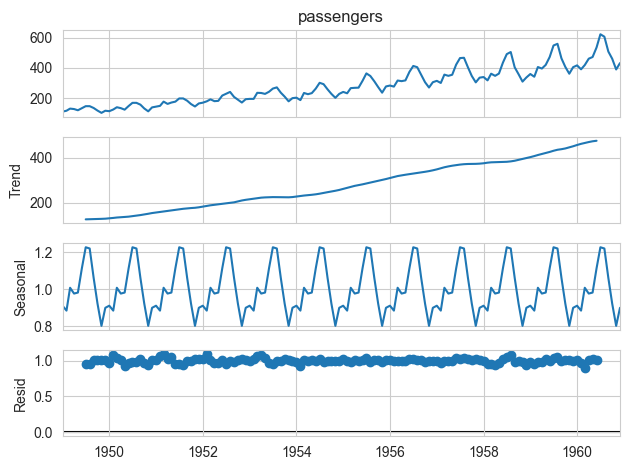

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Load airline passenger data
airlines = sns.load_dataset('flights')
# Combine year and month to create a datetime index
airlines['date'] = pd.to_datetime(airlines['year'].astype(str) + '-' + airlines['month'].astype(str), format='%Y-%b')
airlines = airlines.set_index('date')

result = seasonal_decompose(airlines['passengers'], model='multiplicative')
result.plot()
plt.show()

## 8.4 Non-parametric Tests

Non-parametric tests are used when your data does not meet the assumptions of parametric tests (like the t-test), particularly the assumption of normality. They work with ranked data instead of the actual values.

### Mann-Whitney U Test
- **Purpose:** Non-parametric alternative to the independent two-sample t-test.
- **Question:** Are the distributions of two independent samples equal?

In [13]:
# Create two non-normal samples
sample1 = np.random.exponential(size=50)
sample2 = np.random.exponential(scale=1.5, size=50)

u_statistic, p_value = stats.mannwhitneyu(sample1, sample2)
print(f"Mann-Whitney U Test: U-statistic={u_statistic:.2f}, p-value={p_value:.3f}")

Mann-Whitney U Test: U-statistic=930.00, p-value=0.028


### Kruskal-Wallis Test
- **Purpose:** Non-parametric alternative to ANOVA.
- **Question:** Are the distributions of three or more independent samples equal?

In [14]:
sample3 = np.random.exponential(scale=1.2, size=50)

h_statistic, p_value = stats.kruskal(sample1, sample2, sample3)
print(f"Kruskal-Wallis Test: H-statistic={h_statistic:.2f}, p-value={p_value:.3f}")

Kruskal-Wallis Test: H-statistic=5.48, p-value=0.065
